In [1]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq


--2022-04-15 17:44:53--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.32.192.17, 13.32.192.207, 13.32.192.185, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.32.192.17|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq’

SRR835775_1.first10 100%[===================>] 219.52K  --.-KB/s    in 0.06s   

2022-04-15 17:44:53 (3.38 MB/s) - ‘SRR835775_1.first1000.fastq’ saved [224786/224786]



In [2]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq('SRR835775_1.first1000.fastq')

In [4]:
quals[:10]

['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################',
 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########',
 '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A',
 '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################',
 '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################',
 'CCCFFDFDHGHHDHHGIIIHGIJ<GBBBFBGGHDIH@B)?)0?F>DB#####################################################',
 "???=DD0@3ADB<<CE;+3<;EE?1:)1?C1?3BDCB@;)99)0;@;)-(.7A'55A1?.6;(6;.5;;??#############################",
 "@@@DDF?EFFHA;DDHGI<FDFGECCHF:C9DH9F3):??GHB)BFHEAHBG;C';C@EE45?#####################################",
 '@@@FADDFHGBFFHJJJFGEHGGGGCEGHCBFGGJ:D?FGIDHDFGIBFDGIJ=CEHDH7?=BFD@A;>AB5=2=?BB######################',
 '@CCFFADDHHH<CBGIICGGHIJI?FFGHJ?DHGIJ?DGIIIBFCHHI8@@GE

In [5]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [11]:
phred33ToQ(quals[0][5])

32

In [12]:
def createHist(qualityStrings):
    # Create a histogram of quality scores
    hist = [0]*50
    for read in qualityStrings:
        for phred in read:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


In [15]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.5 MB 4.4 MB/s            
     |████████████████████████████████| 3.1 MB 128.8 MB/s            
     |████████████████████████████████| 1.1 MB 90.9 MB/s            
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


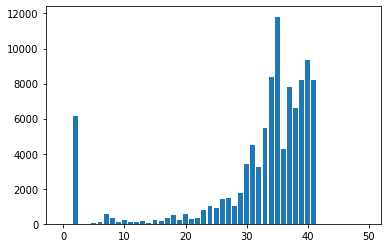

In [17]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()